In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('cannabis.csv')

In [4]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Strain         0
Type           0
Rating         0
Effects        0
Flavor         0
Description    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2277 non-null   object 
 1   Type         2277 non-null   object 
 2   Rating       2277 non-null   float64
 3   Effects      2277 non-null   object 
 4   Flavor       2277 non-null   object 
 5   Description  2277 non-null   object 
dtypes: float64(1), object(5)
memory usage: 124.5+ KB


In [8]:
df.describe()

,Rating
count,2277.000000
mean,4.320729
std,0.821055
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


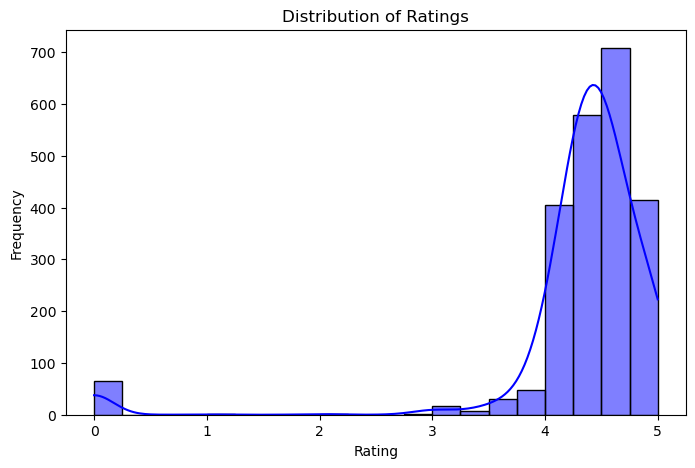

In [9]:
# ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

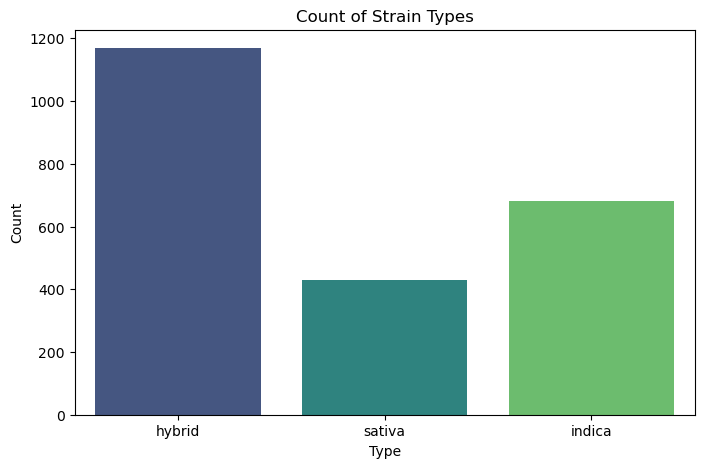

In [10]:
# Strain Types Count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type', palette='viridis')
plt.title('Count of Strain Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

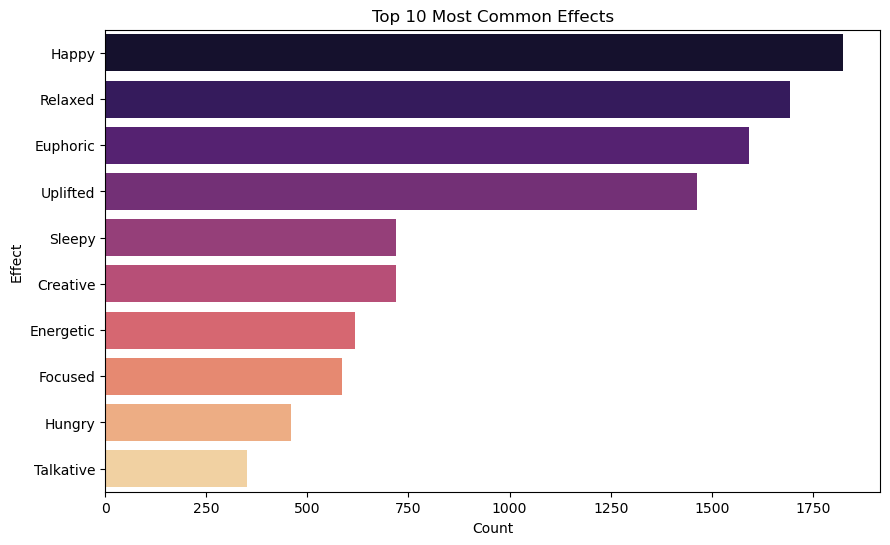

In [11]:
# Top 10 Most Common Effects
effects = df['Effects'].str.split(',').explode()
top_effects = effects.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_effects.values, y=top_effects.index, palette='magma')
plt.title('Top 10 Most Common Effects')
plt.xlabel('Count')
plt.ylabel('Effect')
plt.show()

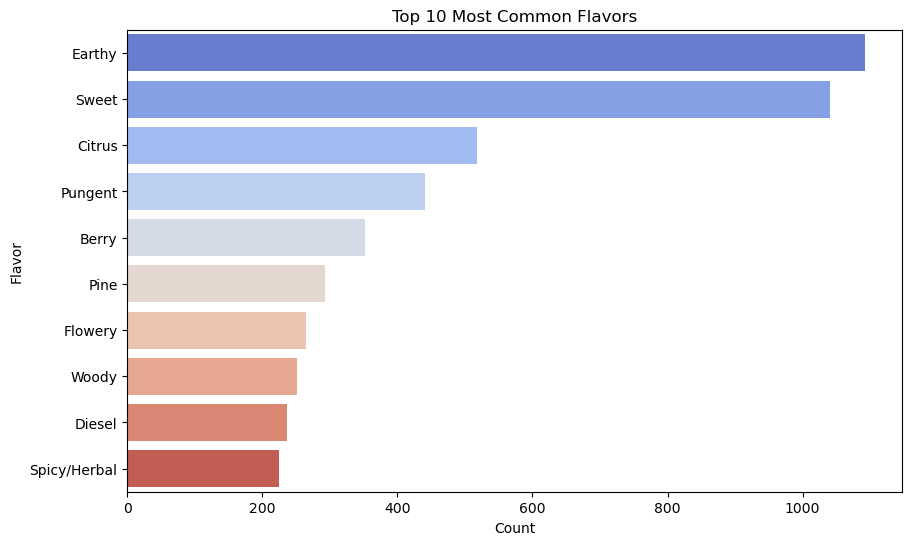

In [12]:
# Top 10 Most Common Flavors
flavors = df['Flavor'].str.split(',').explode()
top_flavors = flavors.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_flavors.values, y=top_flavors.index, palette='coolwarm')
plt.title('Top 10 Most Common Flavors')
plt.xlabel('Count')
plt.ylabel('Flavor')
plt.show()

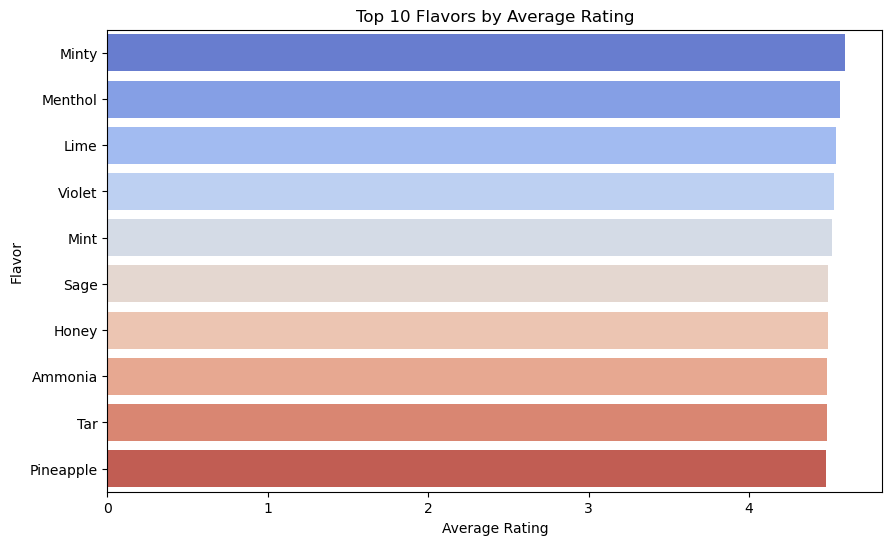

In [13]:
# Converting 'Flavor' column to separate multiple flavors into individual rows
df_flavors = df.assign(Flavor=df['Flavor'].str.split(',')).explode('Flavor')

# Calculating the average rating for each flavor
flavor_rating = df_flavors.groupby('Flavor')['Rating'].mean().sort_values(ascending=False)

# Plotting the top 10 flavors with the highest average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=flavor_rating.head(10).values, y=flavor_rating.head(10).index, palette='coolwarm')
plt.title('Top 10 Flavors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Flavor')
plt.show()

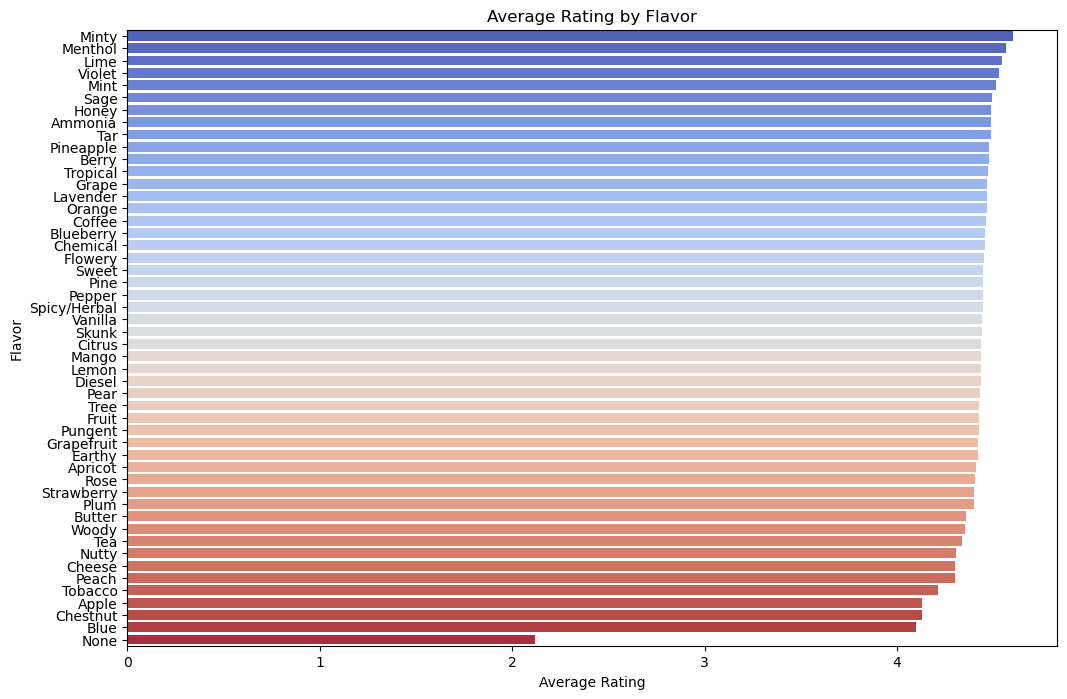

In [14]:
# Plotting all flavors with their average rating
plt.figure(figsize=(12, 8))
sns.barplot(x=flavor_rating.values, y=flavor_rating.index, palette='coolwarm')
plt.title('Average Rating by Flavor')
plt.xlabel('Average Rating')
plt.ylabel('Flavor')
plt.show()

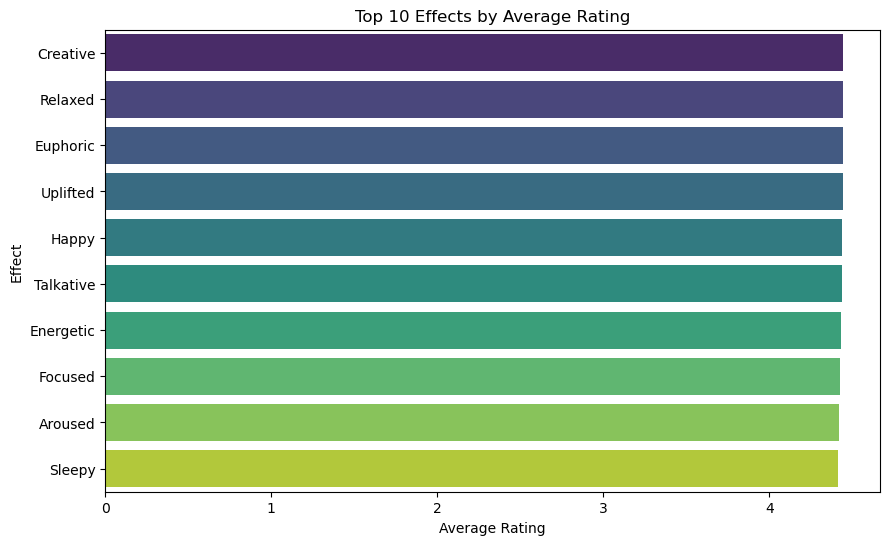

In [15]:
# Converting 'Effects' column to separate multiple effects into individual rows
df_effects = df.assign(Effects=df['Effects'].str.split(',')).explode('Effects')

# Calculating the average rating for each effect
effect_rating = df_effects.groupby('Effects')['Rating'].mean().sort_values(ascending=False)

# Plotting the top 10 effects with the highest average rating
plt.figure(figsize=(10, 6))
sns.barplot(x=effect_rating.head(10).values, y=effect_rating.head(10).index, palette='viridis')
plt.title('Top 10 Effects by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Effect')
plt.show()

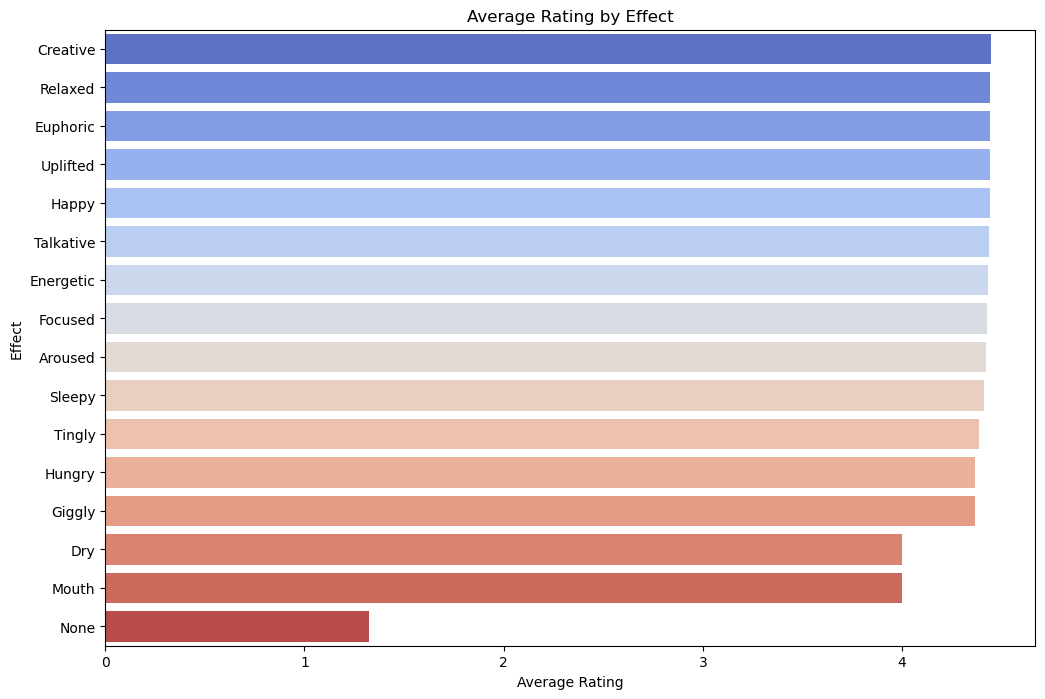

In [16]:
# Plotting all effects with their average rating
plt.figure(figsize=(12, 8))
sns.barplot(x=effect_rating.values, y=effect_rating.index, palette='coolwarm')
plt.title('Average Rating by Effect')
plt.xlabel('Average Rating')
plt.ylabel('Effect')
plt.show()

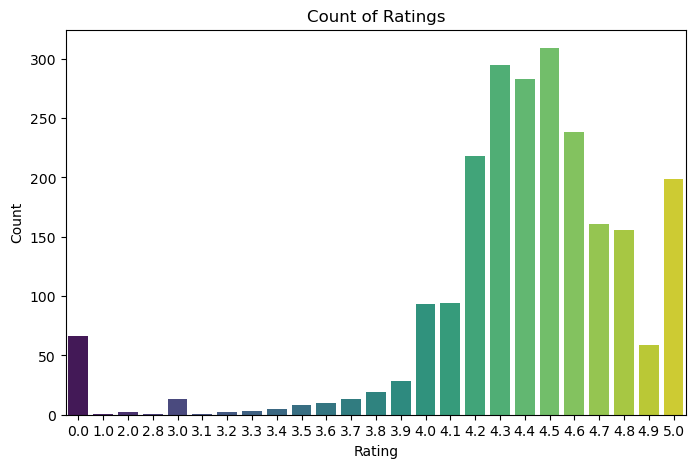

In [17]:
# Plotting the count of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating', palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

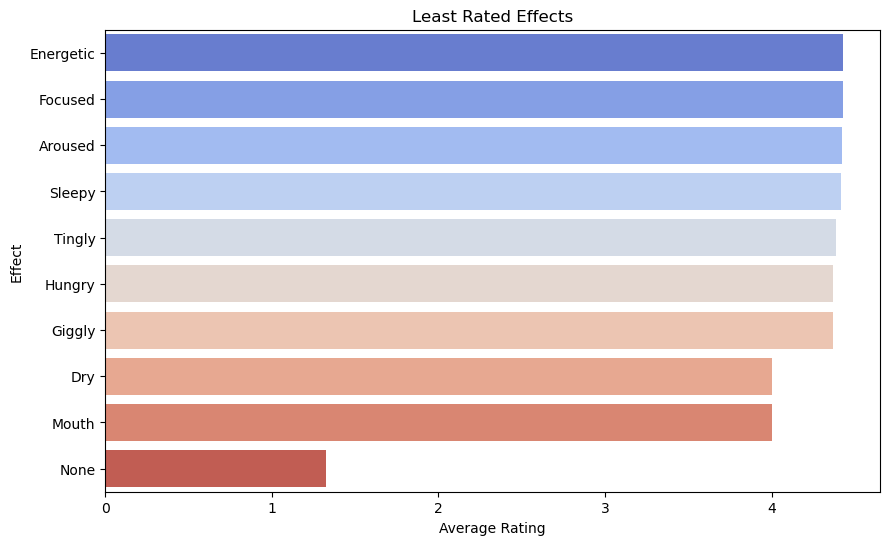

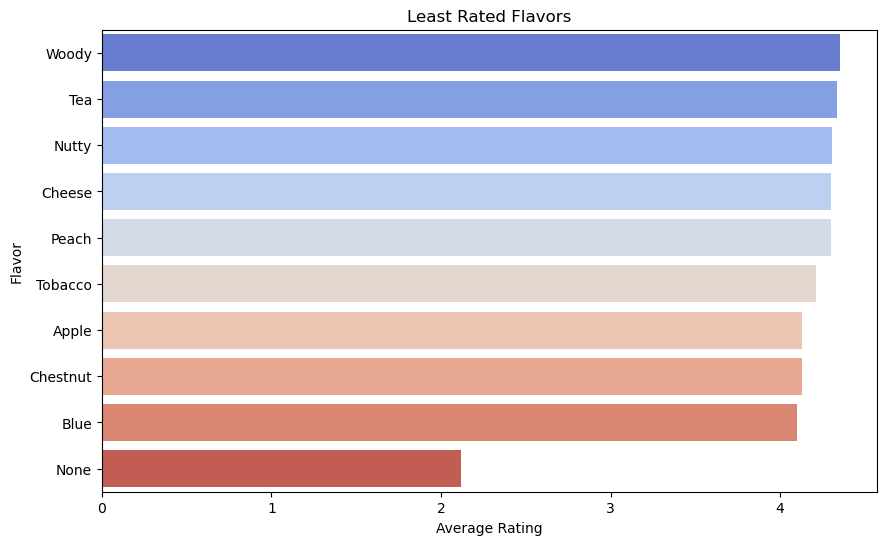

In [18]:
# Plotting the least rated effects
plt.figure(figsize=(10, 6))
sns.barplot(x=effect_rating.tail(10).values, y=effect_rating.tail(10).index, palette='coolwarm')
plt.title('Least Rated Effects')
plt.xlabel('Average Rating')
plt.ylabel('Effect')
plt.show()

# Plotting the least rated flavors
plt.figure(figsize=(10, 6))
sns.barplot(x=flavor_rating.tail(10).values, y=flavor_rating.tail(10).index, palette='coolwarm')
plt.title('Least Rated Flavors')
plt.xlabel('Average Rating')
plt.ylabel('Flavor')
plt.show()

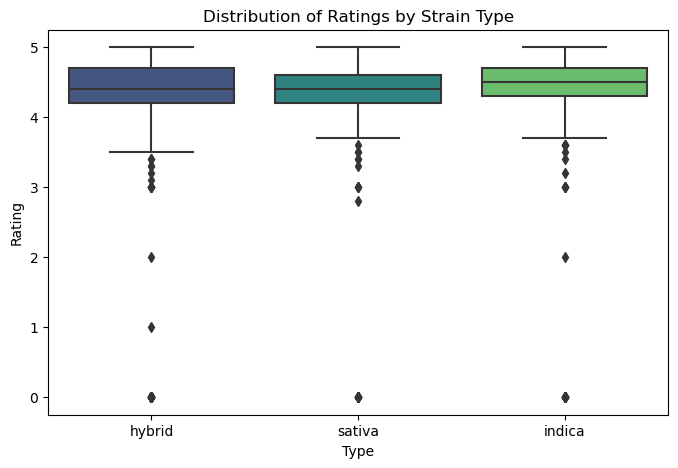

In [19]:
# Distribution of Ratings by Strain Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Type', y='Rating', palette='viridis')
plt.title('Distribution of Ratings by Strain Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

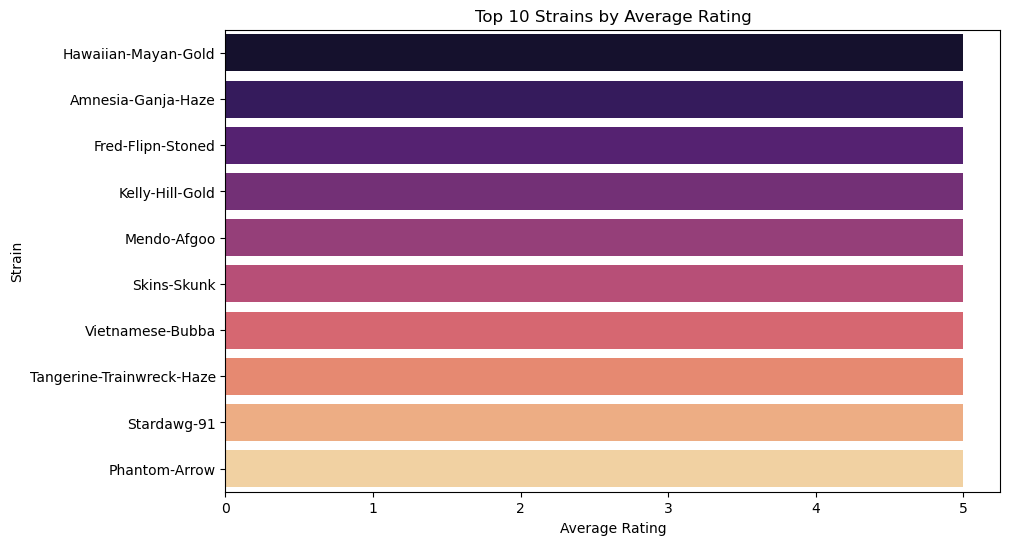

In [20]:
# Top Strains by Rating
top_strains = df.groupby('Strain')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_strains.values, y=top_strains.index, palette='magma')
plt.title('Top 10 Strains by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Strain')
plt.show()

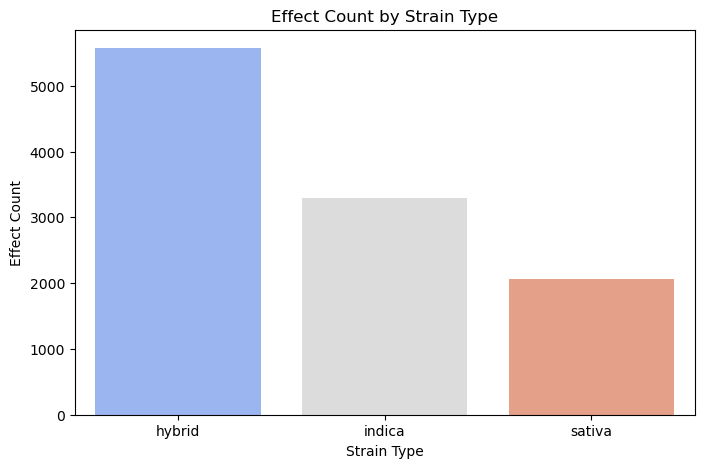

In [21]:
# Effect Count by Strain Type
effect_count_by_type = df_effects.groupby('Type')['Effects'].count()
plt.figure(figsize=(8, 5))
sns.barplot(x=effect_count_by_type.index, y=effect_count_by_type.values, palette='coolwarm')
plt.title('Effect Count by Strain Type')
plt.xlabel('Strain Type')
plt.ylabel('Effect Count')
plt.show()

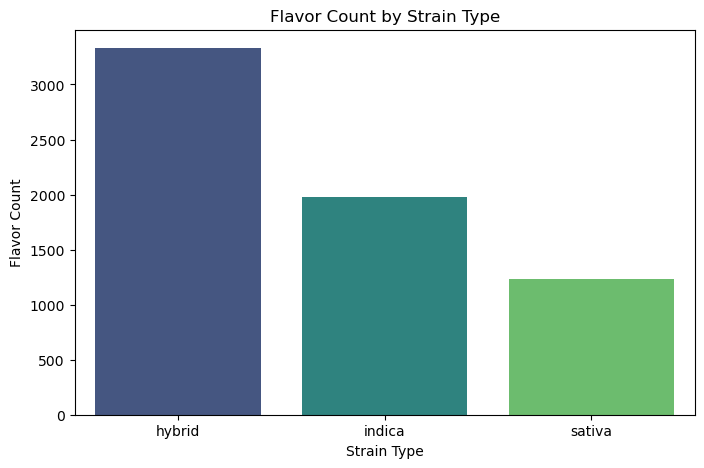

In [22]:
# Flavor Count by Strain Type
flavor_count_by_type = df_flavors.groupby('Type')['Flavor'].count()
plt.figure(figsize=(8, 5))
sns.barplot(x=flavor_count_by_type.index, y=flavor_count_by_type.values, palette='viridis')
plt.title('Flavor Count by Strain Type')
plt.xlabel('Strain Type')
plt.ylabel('Flavor Count')
plt.show()

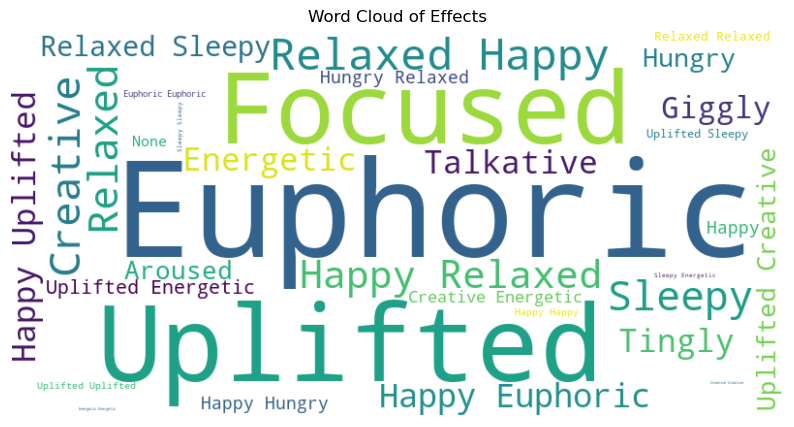

In [23]:
# Word Cloud for Effects or Flavors
from wordcloud import WordCloud

# Word cloud for effects
effect_text = ' '.join(effects.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(effect_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Effects')
plt.show()

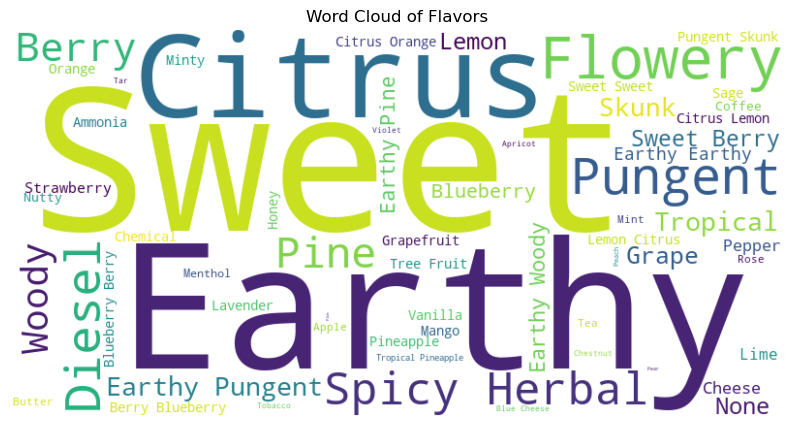

In [24]:
# Word cloud for flavors
flavor_text = ' '.join(flavors.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(flavor_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Flavors')
plt.show()

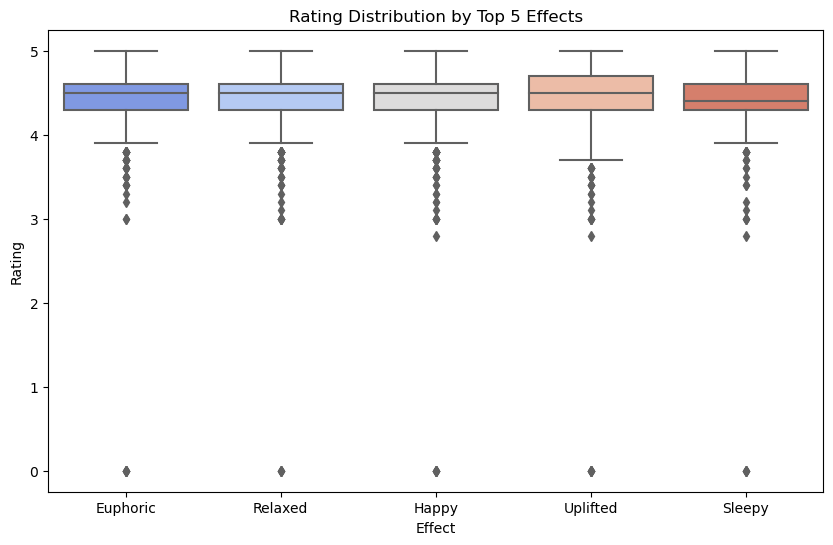

In [25]:
# Rating Distribution by Effect
top_5_effects = top_effects.head(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_effects[df_effects['Effects'].isin(top_5_effects)], x='Effects', y='Rating', palette='coolwarm')
plt.title('Rating Distribution by Top 5 Effects')
plt.xlabel('Effect')
plt.ylabel('Rating')
plt.show()

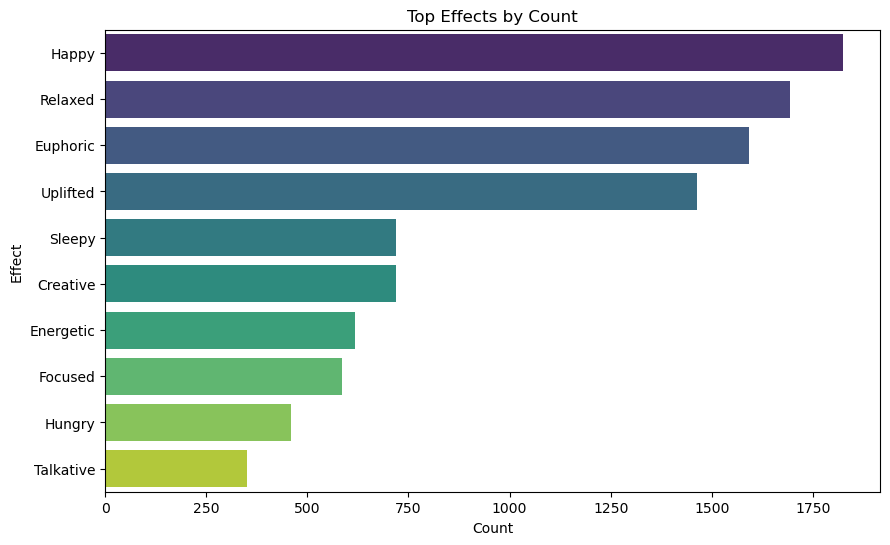

In [26]:
# Top Effects by Count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_effects.values, y=top_effects.index, palette='viridis')
plt.title('Top Effects by Count')
plt.xlabel('Count')
plt.ylabel('Effect')
plt.show()

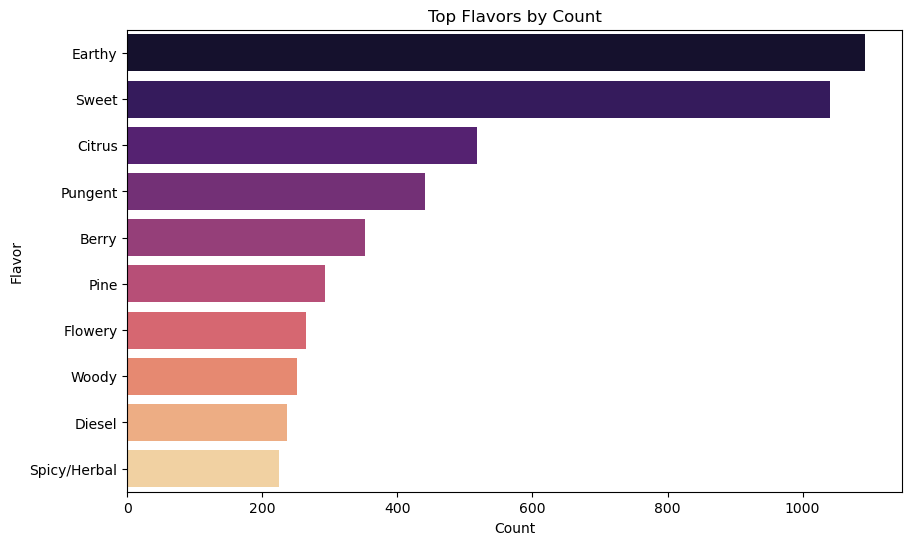

In [27]:
# Top Flavors by Count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_flavors.values, y=top_flavors.index, palette='magma')
plt.title('Top Flavors by Count')
plt.xlabel('Count')
plt.ylabel('Flavor')
plt.show()

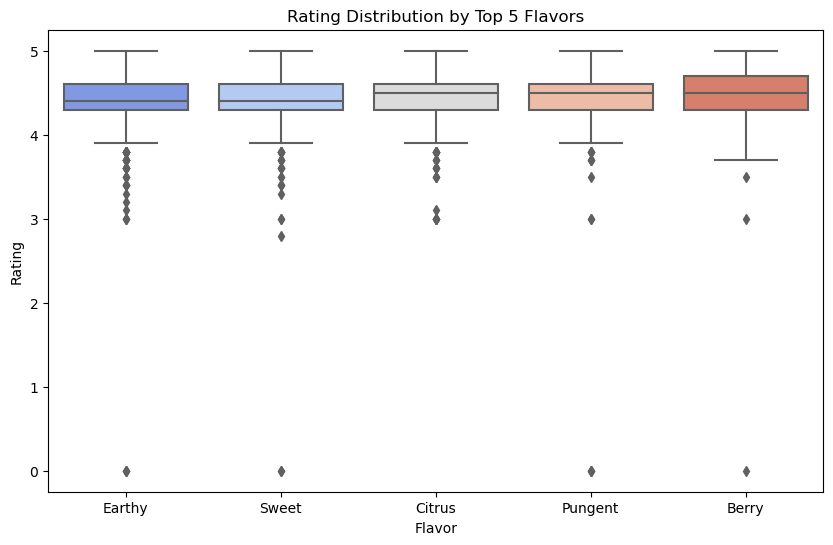

In [28]:
# Rating Distribution by Top Flavors
top_5_flavors = top_flavors.head(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_flavors[df_flavors['Flavor'].isin(top_5_flavors)], x='Flavor', y='Rating', palette='coolwarm')
plt.title('Rating Distribution by Top 5 Flavors')
plt.xlabel('Flavor')
plt.ylabel('Rating')
plt.show()

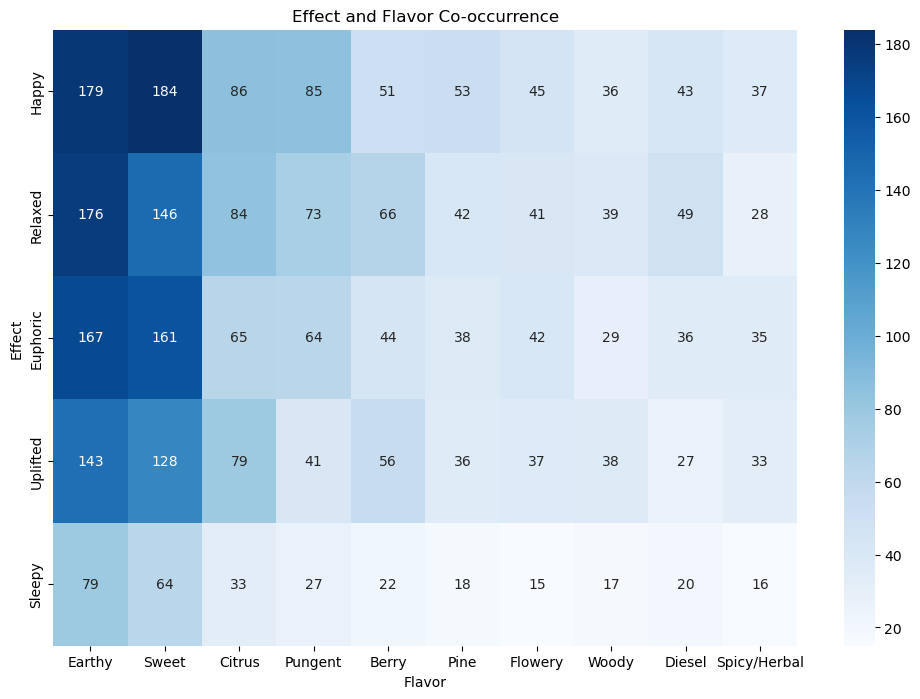

In [29]:
# Effect and Flavor Co-occurrence

# Aligning indices of df_effects and df_flavors
aligned_effects = df_effects['Effects'].reset_index(drop=True)
aligned_flavors = df_flavors['Flavor'].reset_index(drop=True)

# Creating the crosstab
co_occurrence = pd.crosstab(aligned_effects, aligned_flavors)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence.loc[top_5_effects, top_flavors.index], annot=True, cmap='Blues', fmt='d')
plt.title('Effect and Flavor Co-occurrence')
plt.xlabel('Flavor')
plt.ylabel('Effect')
plt.show()

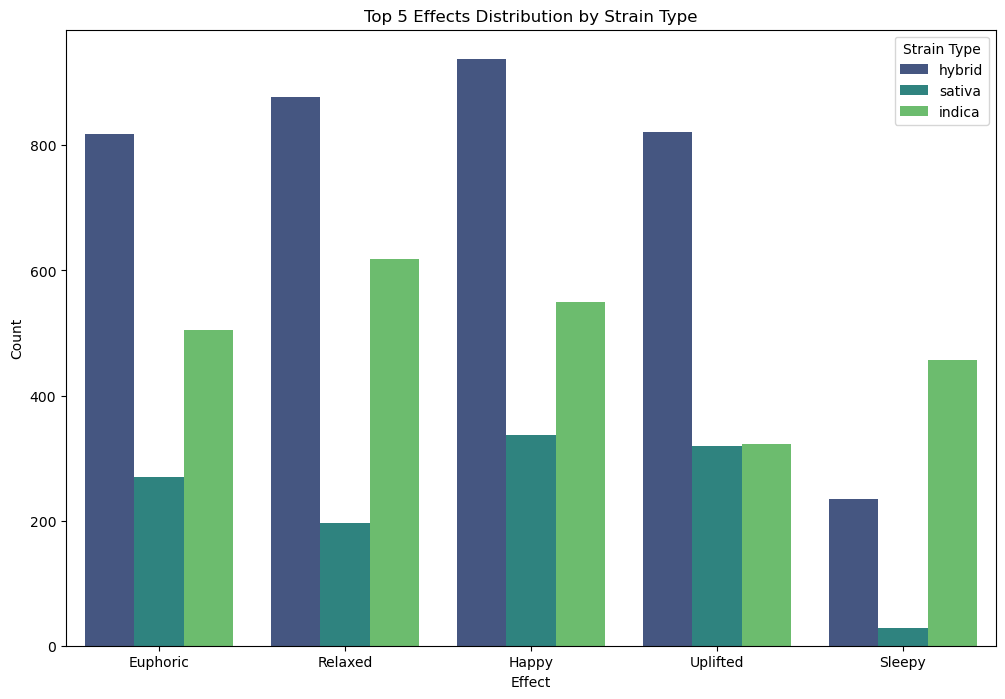

In [30]:
# Effect and Flavor Distribution by Strain Type
plt.figure(figsize=(12, 8))
sns.countplot(data=df_effects[df_effects['Effects'].isin(top_5_effects)], x='Effects', hue='Type', palette='viridis')
plt.title('Top 5 Effects Distribution by Strain Type')
plt.xlabel('Effect')
plt.ylabel('Count')
plt.legend(title='Strain Type')
plt.show()

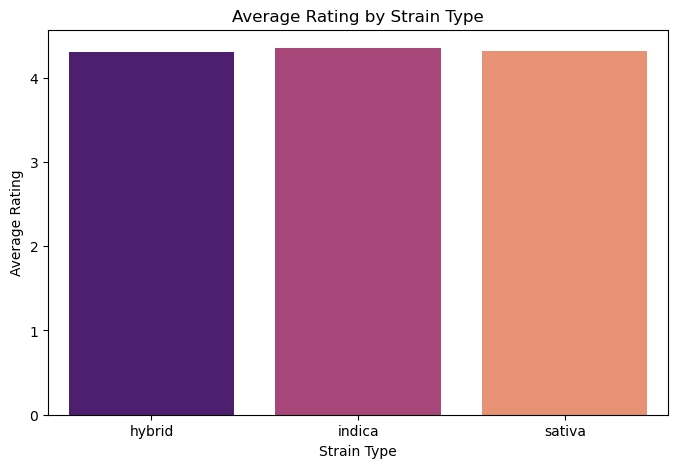

In [31]:
# Average Rating by Strain Type
avg_rating_by_type = df.groupby('Type')['Rating'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_type.index, y=avg_rating_by_type.values, palette='magma')
plt.title('Average Rating by Strain Type')
plt.xlabel('Strain Type')
plt.ylabel('Average Rating')
plt.show()

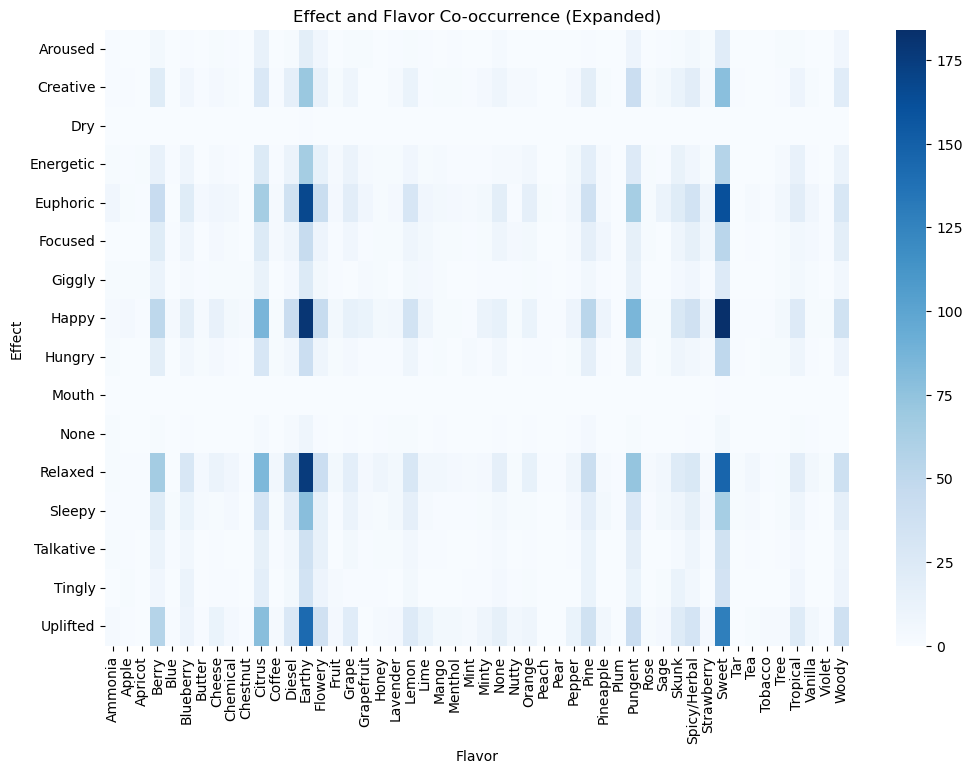

In [32]:
# Effect and Flavor Co-occurrence Heatmap (Expanded)
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence, cmap='Blues', cbar=True)
plt.title('Effect and Flavor Co-occurrence (Expanded)')
plt.xlabel('Flavor')
plt.ylabel('Effect')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Preprocessing the 'effects' column
effects_text = effects.groupby(effects.index).apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(effects_text)

# Defining the target variable
y = df['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")



Mean Squared Error: 0.42881101305767333
R2 Score: 0.24414811442191442
